## Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [30]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Reading data from remote link
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
print("Data imported successfully")

Data imported successfully


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [26]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking the linearity of the data

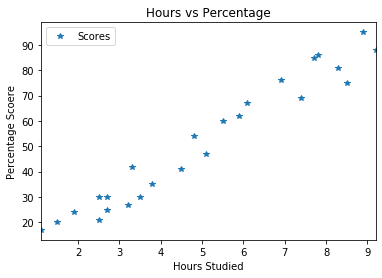

In [4]:
# Plotting the distribution of scores
data.plot(x = 'Hours', y= 'Scores', style = '*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scoere');

### Checking the distribution of the data

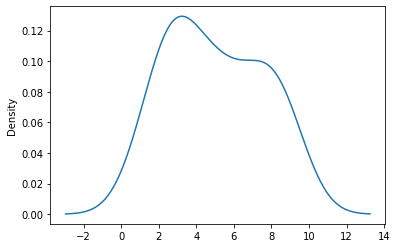

In [27]:
# Independent Variable
data.Hours.plot(kind = "density");

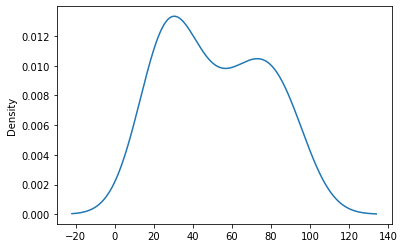

In [29]:
# Dependent Variable
data.Scores.plot(kind = "density");

### Bivariate analysis using Bar plot

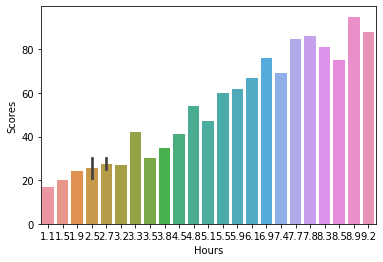

In [32]:
sns.barplot(x = 'Hours', y = 'Scores', data = data)  ;

Here we can observe that, as the number of hours increase the Scores will increase.

__From the graph above, we can clearly see that there is a Positive Linear Relation between the "Number of hours studied" and "Percentage of score".__

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets.

We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Training the Algorithm
Linear Regression

In [8]:
#importing Model
regressor = LinearRegression()
#Fitting the model
regressor.fit(X_train, y_train)

print("Training is Complete")

Training is Complete


In [23]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

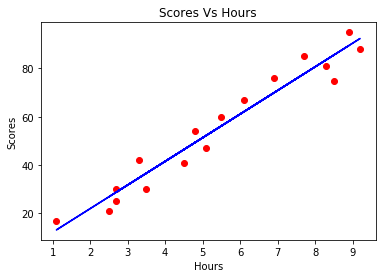

In [24]:
#For Training data
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores Vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [10]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9568211104435257
Training Score
0.9484997422695115


### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [12]:
#predicting Scores
y_pred = regressor.predict(X_test)

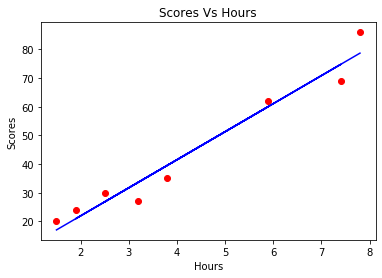

In [22]:
#For Testing Data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Scores Vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [13]:
#Comparing the Actual vs. Predicted
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


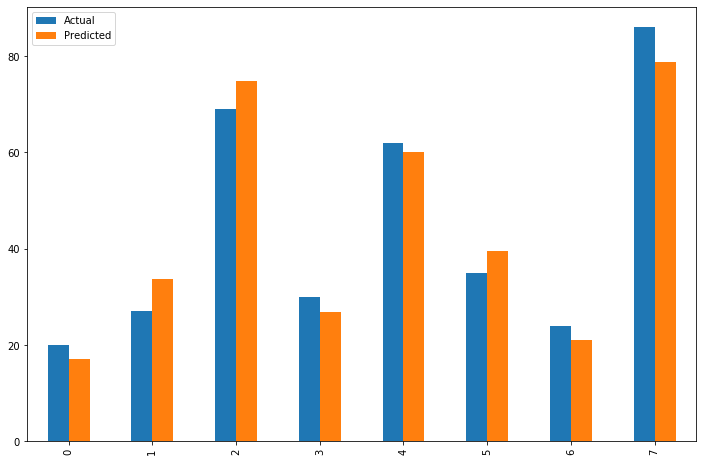

In [34]:
df.plot(kind='bar',figsize=(12,8));

In [14]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.91505723]


### Model Evaluation Metrics

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.


In [20]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error: ", MSE)
print("Mean Absolute Error: ", MAE)

Mean Squared Error:  22.96509721270043
Mean Absolute Error:  4.419727808027652


## Conclusion

### Predicted score if a student study for "9.25 hours" is he can score "92.92". 
### This we determined using simple linear regression model.
### And with Mean Absolute Error of 4.42